<a href="https://colab.research.google.com/github/manjushatr/CustomerBehaviorAnalysis/blob/main/CustomerBehaviorAnalysis_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as py

In [ ]:
basketdf = pd.read_csv('customer_supermarket.csv', sep='\t', index_col=0, decimal=',')

In [ ]:
basketdf.head(10)

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
0,536365,01/12/10 08:26,2.55,17850.0,United Kingdom,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0
1,536365,01/12/10 08:26,3.39,17850.0,United Kingdom,71053,WHITE METAL LANTERN,6.0
2,536365,01/12/10 08:26,2.75,17850.0,United Kingdom,84406B,CREAM CUPID HEARTS COAT HANGER,8.0
3,536365,01/12/10 08:26,3.39,17850.0,United Kingdom,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0
4,536365,01/12/10 08:26,3.39,17850.0,United Kingdom,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0
5,536365,01/12/10 08:26,7.65,17850.0,United Kingdom,22752,SET 7 BABUSHKA NESTING BOXES,2.0
6,536365,01/12/10 08:26,4.25,17850.0,United Kingdom,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6.0
7,536366,01/12/10 08:28,1.85,17850.0,United Kingdom,22633,HAND WARMER UNION JACK,6.0
8,536366,01/12/10 08:28,1.85,17850.0,United Kingdom,22632,HAND WARMER RED POLKA DOT,6.0
9,536368,01/12/10 08:34,4.25,13047.0,United Kingdom,22960,JAM MAKING SET WITH JARS,6.0


In [ ]:
basketdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11708 entries, 0 to 13777
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   BasketID         11708 non-null  object 
 1   BasketDate       11707 non-null  object 
 2   Sale             11707 non-null  float64
 3   CustomerID       9756 non-null   object 
 4   CustomerCountry  11707 non-null  object 
 5   ProdID           11707 non-null  object 
 6   ProdDescr        11678 non-null  object 
 7   Qta              11707 non-null  float64
dtypes: float64(2), object(6)
memory usage: 823.2+ KB


In [ ]:
basketdf.shape

(11708, 8)

There are object and numeric datas in the dataset. To analyse the customers on amount spend in transactions an amount column is to be added. The basket date is to be converted to date time format, since it is object type 

In [ ]:
# convert dates in a suitable format
basketdf['BasketDate'] = pd.to_datetime(basketdf['BasketDate'], dayfirst=True)

In [ ]:
# add 'Amount' attribute, useful for some additional features on customer's purchase behaviour
basketdf['Amount'] = basketdf['Sale'] * basketdf['Qta']

In [ ]:
basketdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11708 entries, 0 to 13777
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   BasketID         11708 non-null  object        
 1   BasketDate       11707 non-null  datetime64[ns]
 2   Sale             11707 non-null  float64       
 3   CustomerID       9756 non-null   object        
 4   CustomerCountry  11707 non-null  object        
 5   ProdID           11707 non-null  object        
 6   ProdDescr        11678 non-null  object        
 7   Qta              11707 non-null  float64       
 8   Amount           11707 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 914.7+ KB


In [ ]:
basketdf.shape

(11708, 9)

In [ ]:
basketdf.isnull().sum()

BasketID              0
BasketDate            1
Sale                  1
CustomerID         1952
CustomerCountry       1
ProdID                1
ProdDescr            30
Qta                   1
Amount                1
dtype: int64

ProdDescr and CustomerId columns have null values. The prodDescr is included in the customerId. Counting all the rows where both attributes are null

In [ ]:
basketdf[basketdf['CustomerID'].isnull() & basketdf['ProdDescr'].isnull()].count()

BasketID           30
BasketDate         29
Sale               29
CustomerID          0
CustomerCountry    29
ProdID             29
ProdDescr           0
Qta                29
Amount             29
dtype: int64

In [ ]:
basketdf.describe().T

,count,mean,std,min,25%,50%,75%,max
Sale,11707.0,3.533582,11.266180,0.0,1.25,2.10,4.21,887.52
Qta,11707.0,7.982404,96.846268,-9360.0,1.00,3.00,8.00,2880.00
Amount,11707.0,17.190629,53.075429,-403.2,3.30,8.25,17.00,1627.20


There are negative values in sale, qta and hence amount. Hence analysing each feature

In [ ]:
#BasketID
basketcounts = basketdf['BasketID'].value_counts()
basketcounts.describe()

count    612.000000
mean      19.130719
std       32.703337
min        1.000000
25%        2.000000
50%       10.000000
75%       22.000000
max      296.000000
Name: BasketID, dtype: float64

The number of distinct baskets is 24627

# Quantity

counting the negative values

In [ ]:
# rows with negative qta
qtanegqta = basketdf['Qta'] < 0
basketdf[qtanegqta].count()

BasketID           163
BasketDate         163
Sale               163
CustomerID         129
CustomerCountry    163
ProdID             163
ProdDescr          141
Qta                163
Amount             163
dtype: int64

# Cost

Rows with zero cost

In [ ]:
zerocost = basketdf['Sale'] == 0
basketdf[zerocost].count()

BasketID           33
BasketDate         33
Sale               33
CustomerID          1
CustomerCountry    33
ProdID             33
ProdDescr           4
Qta                33
Amount             33
dtype: int64

There are 1279 rows with zero cost

In [ ]:
basketdf[qtanegqta | zerocost].count()

BasketID           172
BasketDate         172
Sale               172
CustomerID         130
CustomerCountry    172
ProdID             172
ProdDescr          143
Qta                172
Amount             172
dtype: int64

These are not relevent for our project so we decided to drop them. 

In [ ]:
# drop rows with negative quantity
basketdf.drop(basketdf[qtanegqta].index, inplace=True)
# drop rows with null cost
basketdf.drop(basketdf[zerocost].index, inplace=True)

<ipython-input-19-96e17aa75d6f>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  basketdf.drop(basketdf[zerocost].index, inplace=True)


In [ ]:
basketdf.shape

(11536, 9)

[]

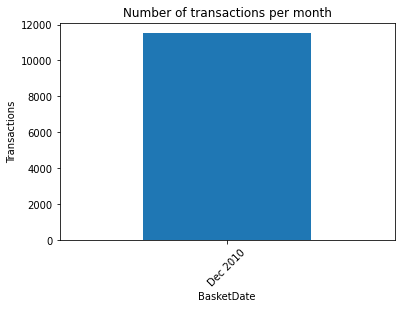

In [ ]:
tran = basketdf.groupby(pd.Grouper(key='BasketDate', freq='M'))['BasketID'].count()
tran.index = tran.index.strftime('%b %Y')
tranplt = tran.plot(kind='bar', title='Number of transactions per month', rot=45)

tranplt.set_ylabel('Transactions')
tranplt.plot()

Total numer of transations by each customer

count    371.000000
mean      25.946092
std       30.799918
min        1.000000
25%        9.000000
50%       16.000000
75%       32.000000
max      297.000000
Name: CustomerID, dtype: float64


Text(0, 0.5, 'Transactions')

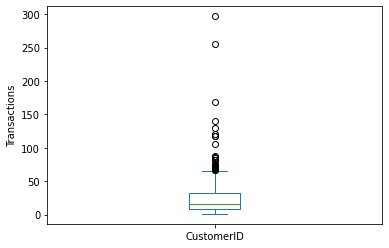

In [ ]:
cust_counts = basketdf['CustomerID'].value_counts()
print(cust_counts.describe())
custplot = cust_counts.plot.box()
custplot.set_ylabel("Transactions")

In [ ]:
basketdf['CustomerID'].isnull().sum()

1910

Drop transactions with null CustomerID

In [ ]:
# drop rows with null customerID
basketdf.dropna(subset=['CustomerID'], inplace=True)

# export cleaned dataset for further analysis
basketdf.to_csv(r'clean_basketdf.csv', index=True, header=True)

Customer Country

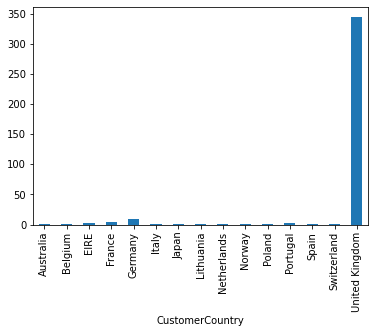

In [ ]:
cc_counts = basketdf.groupby(['CustomerCountry', 'CustomerID']).size().groupby(level=0).size()
cc_counts.plot.bar()

Majority customers are from UK

## *To find out best and worst seller*

In [ ]:
pid_counts = basketdf['ProdID'].value_counts()

In [ ]:
best_seller_id = pid_counts.index[0]
best_seller_descr = basketdf.loc[basketdf['ProdID'] == best_seller_id]['ProdDescr'].iloc[0]
print("Best seller: {} ({})".format(str(best_seller_id), str(best_seller_descr)))

Best seller: 22633 (HAND WARMER UNION JACK)


In [ ]:
worst_seller_id = pid_counts.index[-1]
worst_seller_descr = basketdf.loc[basketdf['ProdID'] == worst_seller_id]['ProdDescr'].iloc[0]
print("Worst seller: {} ({})".format(str(worst_seller_id), str(worst_seller_descr)))

Worst seller: 16169K (WRAP FOLK ART)


## *Correlation*

To calculate pairwise correlation, we transformed some attributes into categorical ones. 

In [ ]:
basketdf_corr = basketdf.copy()
basketdf_corr=basketdf_corr.drop(['ProdDescr'],axis=1)
basketdf_corr['BasketID'] = basketdf_corr['BasketID'].astype('category').cat.codes
basketdf_corr['BasketDate'] = basketdf_corr['BasketDate'].astype('category').cat.codes
basketdf_corr['CustomerID'] = basketdf_corr['CustomerID'].astype('category').cat.codes
basketdf_corr['CustomerCountry'] = basketdf_corr['CustomerCountry'].astype('category').cat.codes

In [ ]:
basketdf_corr.tail()

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,Qta,Amount
13262,491,449,1.45,19,14,22549,8.0,11.60
13266,492,450,2.55,29,14,22086,80.0,204.00
13267,492,450,2.55,29,14,22910,40.0,102.00
13268,492,450,1.69,29,14,84879,8.0,13.52
13269,492,450,5.45,29,14,21754,18.0,98.10


<ipython-input-31-6787dbfb7a21>:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(correlation, dtype=np.bool)


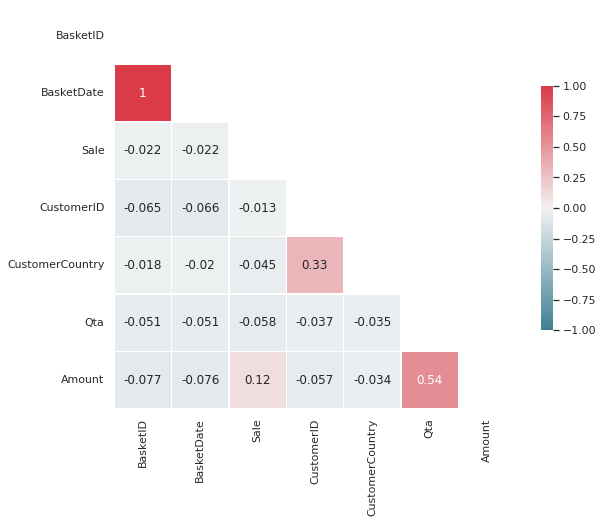

In [ ]:
import seaborn as sns

correlation = basketdf_corr.corr()
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = py.subplots(figsize=(9,9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation, mask=mask, cmap=cmap,annot=True, vmax=1,vmin=-1,
            center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.5})

In [ ]:
basketdf_customer = basketdf.groupby('CustomerID').agg(
    I=('ProdID','count'),
    Iu=('ProdID', 'nunique'))

basketdf_customer['Imax'] = basketdf.groupby(['CustomerID','BasketID']).count().max(level=0)['BasketDate']

<ipython-input-32-28ca157d74ab>:5: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  basketdf_customer['Imax'] = basketdf.groupby(['CustomerID','BasketID']).count().max(level=0)['BasketDate']


In [ ]:
basketdf_customer.head()

,I,Iu,Imax
CustomerID,,,
12395.0,12,12,12
12427.0,10,10,10
12431.0,14,14,14
12433.0,73,73,73
12472.0,70,70,70


In [ ]:
pos_amounts = basketdf[basketdf['Amount'] >= 0].copy()
p_sum = pos_amounts.groupby('CustomerID')['Amount'].transform('sum')
probs = pos_amounts['Amount']/p_sum
pos_amounts['Entropy'] = -(probs * np.log(probs)) #ss.entropy(probs)
basketdf_customer['Entropy'] = pos_amounts.groupby('CustomerID')['Entropy'].sum()

In [ ]:
basketdf_customer.head()

,I,Iu,Imax,Entropy
CustomerID,,,,
12395.0,12,12,12,2.366047
12427.0,10,10,10,2.098492
12431.0,14,14,14,2.545472
12433.0,73,73,73,4.057833
12472.0,70,70,70,4.053347


In [ ]:
# number of baskets per customer
basketdf_customer['BasketNum'] =basketdf.groupby(['CustomerID', 'BasketID']).size().groupby(level=0).size()

In [ ]:
basketdf_group = basketdf.groupby(['CustomerID','BasketID']).agg(BasketSum=('Amount', 'sum'))
basketdf_group = basketdf_group.groupby('CustomerID').agg(BasketMean=('BasketSum', 'mean'), SumExp=('BasketSum', 'sum'))
basketdf_customer['SumExp'] = basketdf_group['SumExp']
basketdf_customer['AvgExp'] = basketdf_group['BasketMean']

In [ ]:
basketdf_customer.describe()


,I,Iu,Imax,Entropy,BasketNum,SumExp,AvgExp
count,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000
mean,25.946092,23.576819,23.078167,2.513562,1.328841,484.167520,351.367484
std,30.799918,24.066943,22.712345,1.028128,1.887284,822.186958,331.320251
min,1.000000,1.000000,1.000000,0.000000,1.000000,15.000000,15.000000
25%,9.000000,9.000000,9.000000,1.920328,1.000000,184.650000,165.455000
50%,16.000000,16.000000,15.000000,2.619036,1.000000,303.400000,273.300000
75%,32.000000,29.000000,29.500000,3.223491,1.000000,427.770000,392.060000
max,297.000000,221.000000,169.000000,5.507327,34.000000,9407.340000,2369.270000


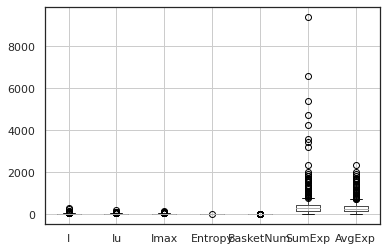

In [ ]:
basketdf_customer.boxplot()


In [ ]:
# use z-score to remove outliers
from scipy.stats import zscore
z_scores = zscore(basketdf_customer)

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_basketdf = basketdf_customer[filtered_entries]

new_basketdf.to_csv(r'Customer_Behaviour_df.csv', index=True, header=True)

new_basketdf.describe()

,I,Iu,Imax,Entropy,BasketNum,SumExp,AvgExp
count,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000
mean,22.135447,20.971182,21.043228,2.447856,1.155620,339.444553,293.678602
std,19.711256,17.853588,18.634323,0.985123,0.435414,282.042518,193.739853
min,1.000000,1.000000,1.000000,0.000000,1.000000,15.000000,15.000000
25%,9.000000,9.000000,8.000000,1.898079,1.000000,174.035000,164.300000
50%,15.000000,15.000000,15.000000,2.592798,1.000000,292.540000,256.900000
75%,30.000000,28.000000,27.500000,3.160613,1.000000,390.895000,358.405000
max,87.000000,77.000000,87.000000,4.140510,3.000000,2366.780000,1314.000000


<ipython-input-41-109e02f123d5>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(correlation, dtype=np.bool)


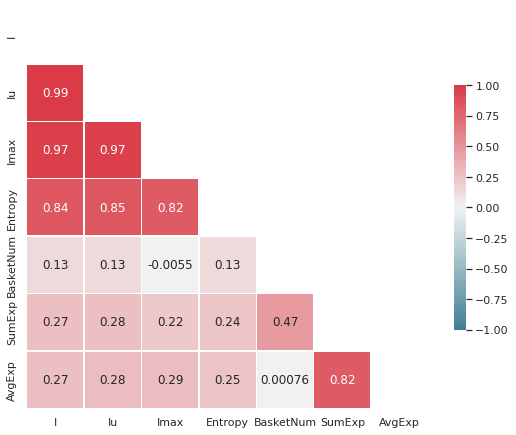

In [ ]:
correlation = new_basketdf.corr()
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fnew, axnew = py.subplots(figsize=(9,9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation, mask=mask, cmap=cmap,annot=True, vmax=1,vmin=-1, center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.5})